<a href="https://colab.research.google.com/github/teppe1/age_detection/blob/master/%E9%A1%94%E7%94%BB%E5%83%8F%E5%B9%B4%E9%BD%A2%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# chainer
import numpy as np
import chainer
from chainer import training
from chainer import iterators, optimizers, serializers
import chainer.functions as F
import chainer.links as L
from chainer.training import extensions
from chainer.datasets import split_dataset
import pandas as pd
pd.options.display.precision = 3      # pandasの有効桁数を指定

In [0]:
import scipy

In [0]:
meta = scipy.io.loadmat("/wiki.mat")

In [58]:
print(meta["wiki"][0, 0][2][0].shape)

(62328,)


- dob：生年月日
- photo_taken：写真が撮影された「年」
- full_path：画像のパス
- gender：性別
- name：名前
- face_location：顔領域の矩形情報
- face_score：顔検出スコア
- second_face_score：2つ目に大きい顔検出スコア

In [0]:
data = pd.DataFrame([meta["wiki"][0, 0][i][0] for i in range(8)]).T
data.columns = ["dob", "photo_taken", "full_path", "gender", "name", "face_location", "face_score", "second_face_score"]

In [28]:
data.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score
0,723671,2009,17/10000217_1981-05-05_2009.jpg,1,Sami Jauhojärvi,"[[111.29109473290997, 111.29109473290997, 252....",4.3,NaN
1,703186,1964,48/10000548_1925-04-04_1964.jpg,1,Dettmar Cramer,"[[252.48330229530742, 126.68165114765371, 354....",2.65,1.95
2,711677,2008,12/100012_1948-07-03_2008.jpg,1,Marc Okrand,"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.33,NaN
3,705061,1961,65/10001965_1930-05-23_1961.jpg,1,Aleksandar Matanović,"[[1, 1, 634, 440]]",-inf,NaN
4,720044,2012,16/10002116_1971-05-31_2012.jpg,0,Diana Damrau,"[[171.61031405173117, 75.57451239763239, 266.7...",3.41,NaN


In [0]:
def name2name(x):
  if not len(x) == 1:
    return None
  else:
    return x[0]

In [0]:
data["full_path"] = data["full_path"].apply(lambda x:x[0])

In [0]:
data["name"] = data["name"].apply(name2name)

In [0]:
data["face_location"] = data["face_location"].apply(lambda x:x[0])

In [34]:
data.isnull().any()

dob                  False
photo_taken          False
full_path            False
gender                True
name                  True
face_location        False
face_score           False
second_face_score     True
dtype: bool

In [0]:
data.to_csv("./face_wiki.csv", index=None)

In [0]:
import datetime

In [0]:
def calc_age(taken, dob):
    birth = datetime.datetime.fromordinal(max(int(dob) - 366, 1))

    # assume the photo was taken in the middle (Jul. 1) of the year
    if birth.month < 7:
        return taken - birth.year
    else:
        return taken - birth.year - 1

In [0]:
ages = []
for dob, photo_taken in zip(data["dob"], data["photo_taken"]):
#   print(dob, photo_taken)
  age = calc_age(photo_taken, dob)
#   print(age)
  ages.append(age)

In [0]:
data["age"] = ages

In [0]:
data.to_csv("./face_wiki_with_age.csv", index=None)

# ここから画像を使う

In [0]:
from PIL import Image

In [0]:
!mkdir images

In [0]:
!mv *.jpg images

In [0]:
filter1 = (data["age"] > 0) & (data["age"] < 100)
filter2 = data["face_score"] > 3

In [77]:
images = np.array(None)
for path in data[filter1 & filter2]["full_path"][:1000]:
  if path.split("/")[0] == "00":
#     im = np.array( Image.open('images/'+path.split("/")[1] ) )
    images = np.append(np.array(Image.open('images/'+path.split("/")[1] )) , images)
    print(images)

[218 219 214 ... 127 122 None]
[39 39 39 ... 127 122 None]
[5 3 4 ... 127 122 None]
[120 88 63 ... 127 122 None]
[25 25 25 ... 127 122 None]
[255 254 254 ... 127 122 None]
[94 108 49 ... 127 122 None]
[99 67 42 ... 127 122 None]
[1 0 8 ... 127 122 None]


In [78]:
images

array([1, 0, 8, ..., 127, 122, None], dtype=object)

In [0]:
im = np.array(Image.open('images/10049200_1891-09-16_1958.jpg'))

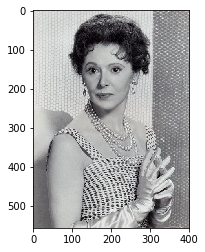

In [86]:
plt.imshow(im)